In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="darkgrid", color_codes=True)
sns.color_palette("Spectral", as_cmap=True)


In [3]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(15,12))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [4]:
data = pd.read_csv("./../dataset_nettoyer.csv", 
                   low_memory=False,  
                   encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75816 entries, 0 to 75815
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             75816 non-null  object 
 1   categories_tags          75816 non-null  object 
 2   labels_en                75816 non-null  object 
 3   countries_en             75816 non-null  object 
 4   additives_n              75816 non-null  float64
 5   nutriscore_score         75816 non-null  float64
 6   nutriscore_grade         75816 non-null  object 
 7   main_category_en         75816 non-null  object 
 8   energy-kcal_100g         75816 non-null  float64
 9   energy_100g              75816 non-null  float64
 10  fat_100g                 75816 non-null  float64
 11  saturated-fat_100g       75816 non-null  float64
 12  carbohydrates_100g       75816 non-null  float64
 13  sugars_100g              75816 non-null  float64
 14  fiber_100g            

In [5]:
data = data[data['nutriscore_grade'].str.contains("#")==False]

# Analyse en composantes principales

## Objectifs

**Le principales objectif de cette ACP est la description des données dans un premiers temps.
Résumé graphiquement la matrice de corrélation, mais aussi de remplacer les variables par des variables synthétiques (ACP) afin d'appliquer de nouveau traitement stattistique pertinants.**

## Separation des feature vectors et des labels

In [6]:
X = data[['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g','nutriscore_score']]

In [9]:
Y = data[['nutriscore_grade']]

In [10]:
Z = data[['main_category_en']]

## Rescaling des features vectors (redimensionnement centré réduit)

Cette technique est utilisé afin de standardisé l'unitée de nos différentes features.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.83714106,  0.75398278, -0.37954312, ..., -0.74252773,
        -0.71337548, -0.95288745],
       [-0.32880767, -0.38102501, -0.43119458, ..., -0.04652599,
         0.0498464 ,  1.02363884],
       [-0.62534954, -0.66948003, -0.42086429, ..., -0.7378144 ,
        -0.70796256, -0.70582167],
       ...,
       [-0.65230789, -0.69613076, -0.43119458, ..., -0.74305144,
        -0.71397692, -0.95288745],
       [-0.39620355, -0.446868  , -0.32272651, ..., -0.41154722,
        -0.35852843, -0.82935456],
       [ 3.11512181,  2.97069689,  3.18440777, ...,  1.98020594,
         2.35334505,  2.25896777]])

## ACP avec sklearn

le nombre de component p est définie par le nombre de variable p.

In [8]:
from sklearn.decomposition import PCA

num_components = X.shape[1]

pca = PCA(n_components= num_components)

pca.fit(X_scaled)

PCA(n_components=7)

## Explained variance ratio

In [9]:
pca.explained_variance_ratio_

array([0.72087   , 0.16396584, 0.06123957, 0.03099475, 0.01053645,
       0.00695221, 0.00544118])

Notre premier component synthétise 74% de nos donneés, le seconde 18,9%.

## Scree plot

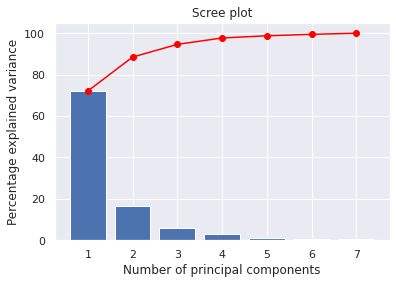

In [12]:
display_scree_plot(pca)

Les 2 premier composant principaux suffirons pour décrire notre dataset car ils décrivent 74% et 18% des données
cependant le 3ème componant pourrait mieux décrire les données que le second il est important de l'importé également

In [13]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc2 = pca.components_[2]

## Cercle de correlation

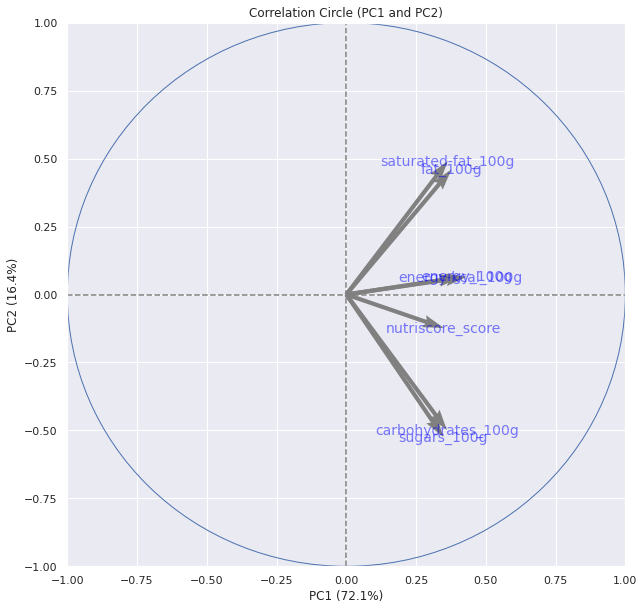

In [14]:
pcs = pca.components_

display_circles(pcs, num_components, pca, [(0,1)], labels=np.array(X.columns))

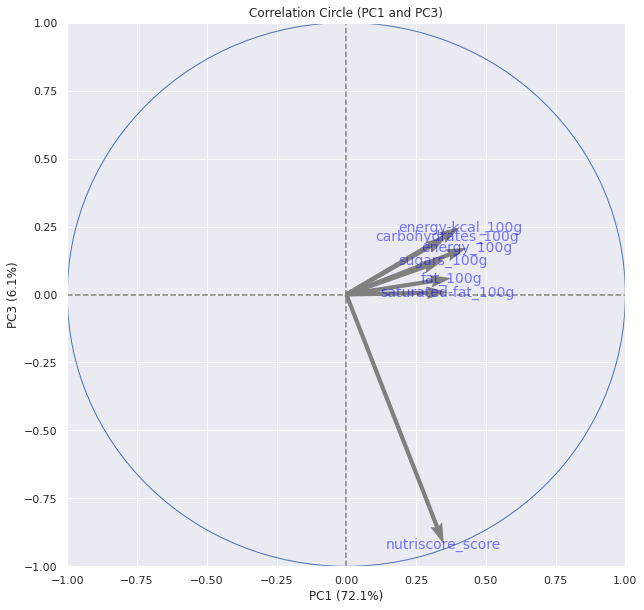

In [15]:
pcs = pca.components_

display_circles(pcs, num_components, pca, [(0,2)], labels=np.array(X.columns))

**PC1:** saturated fat, fat, carbohydrates, sugars

**PC2:** energy, energy_kcal

**Notre cercle de correlation a pu mettre en evidance comme la matrice de correlation les groupes de variables.**

## Visualisation graphique des individus avec nos components

In [16]:
X_projeted = pca.transform(X_scaled)

In [17]:
display_factorial_planes(X_projeted,num_components,pca,[(0,1)], illustrative_var= Y,alpha=0.5)

NameError: name 'Y' is not defined

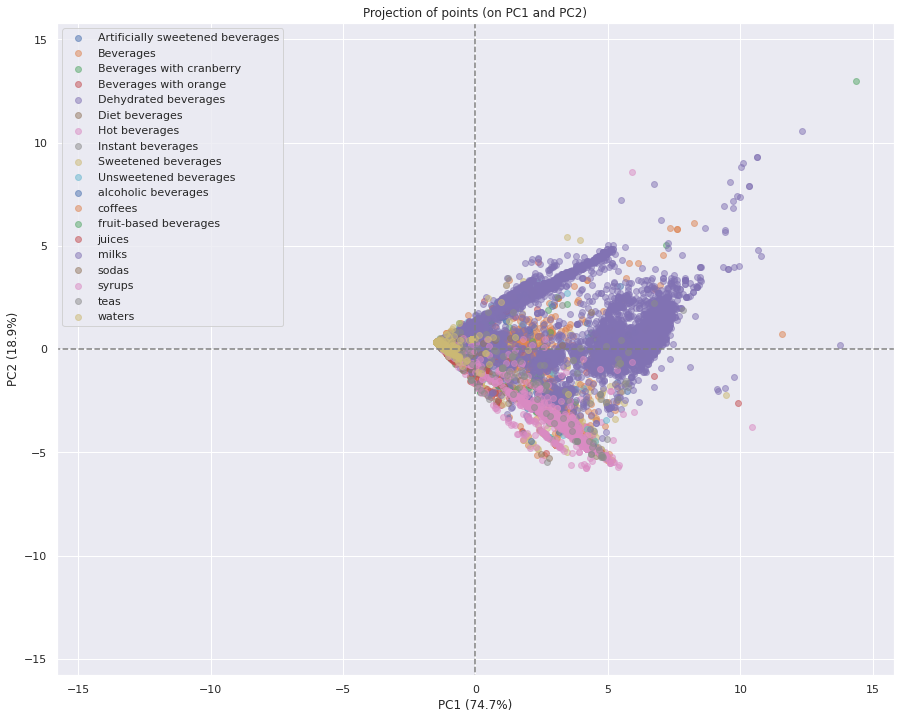

In [50]:
display_factorial_planes(X_projeted,num_components,pca,[(0,1)], illustrative_var= Z,alpha=0.5)

- Notre première visualisation graphique **n'a pas pu mettre en evidance les groupe d'individus 2D pour notre nutriscore**
- Notre seconde visualisation graphique nous montre certains cluster:
    - Waters et Syrups comme nous l'avions vu précédemment dans notre analyse la correspondance entre les nutriments et les catégorie, **cependant la visualisation n'est pas assez clair pour mettre en évidence un clustering par catégorie de boisson via notre composantes principales**

-------------------------------------------------------------------------------------------------------------------

## ACP confirmation des résultats sans utilisation de la lib openclassrooms 

In [21]:
x = data[['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g']]

In [22]:
x = StandardScaler().fit_transform(x)

In [23]:
pca = PCA(n_components=2)

In [24]:
principalComponents = pca.fit_transform(x)

In [25]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, data[['nutriscore_grade']]], axis = 1)

In [27]:
import matplotlib.cm as cm

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

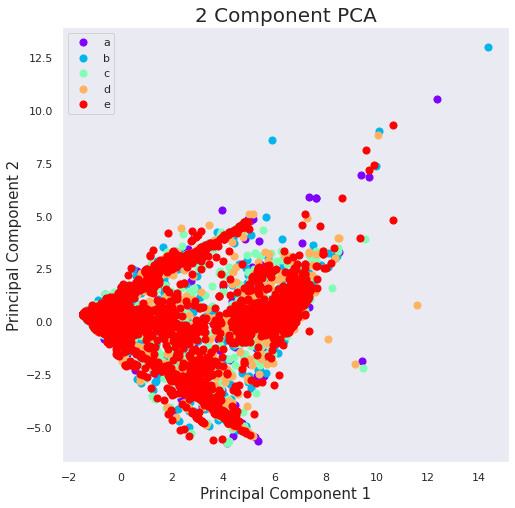

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['a', 'b', 'c', 'd', 'e']
colors = cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['nutriscore_grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [56]:
finalDf_2 = pd.concat([principalDf, data[['main_category_en']]], axis = 1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

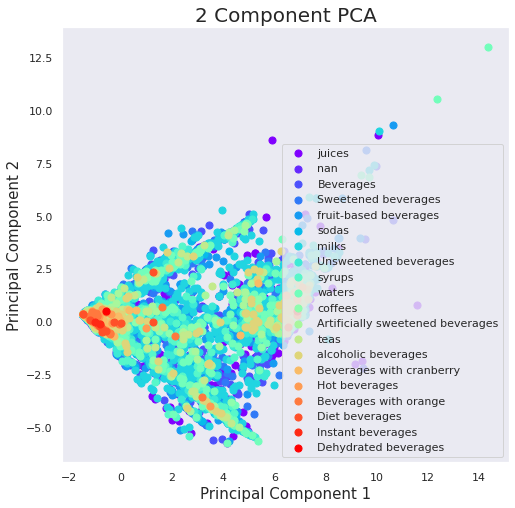

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = finalDf_2.main_category_en.unique()
colors = cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_2['main_category_en'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'principal component 1']
               , finalDf_2.loc[indicesToKeep, 'principal component 2']
               ,c = color
               , s = 50)
ax.legend(targets)
ax.grid()